<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_4_1_Lab_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Overfitting

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression, Ridge

## Functions

In [2]:
def munge(base, exp):
    if exp == 0:
        return ''
    if exp == 1:
        return base
    return base + f'^{{{exp}}}'

In [3]:
def map_one_feature(X1, degree):
    """
    Feature mapping function to polynomial features
    """
    X1 = np.atleast_1d(X1)
    out = []
    string = ''
    k = 0
    for i in range(1, degree + 1):
        out.append((X1 ** i))
        string = string + f"w_{{{k}}}{munge('x_0', i)} + "
        k += 1
    string += 'b'

    return np.stack(out, axis=1), string

In [4]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray): Shape (m,n) input data, m examples, n features

    Returns:
      X_norm (ndarray): Shape (m,n)  input normalized by column
      mu (ndarray):     Shape (n,)   mean of each feature
      sigma (ndarray):  Shape (n,)   standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## Overfit Example

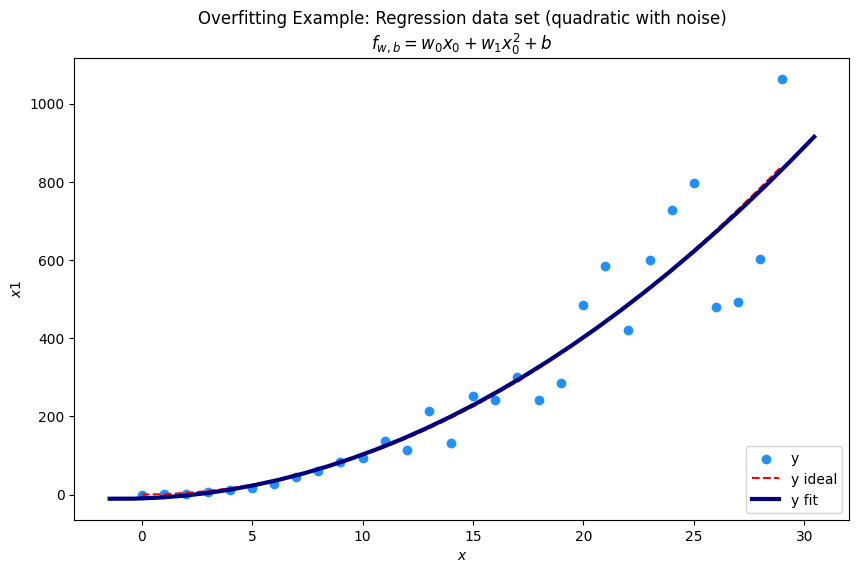

In [5]:
def overfit_example(logistic=False, lmbda=0, degree=1):
    fig, ax = plt.subplots(figsize=(10, 6))

    if logistic:
        m = 50
        n = 2
        np.random.seed(2)
        X_train = 2 * (np.random.rand(50, 2) - [0.5, 0.5])
        y_train = X_train[:, 1] + 0.5 > X_train[:, 0]**2 + 0.5 * np.random.rand(m)
        train = y_train + 0 # convert from boolean to integer
        x_ideal = np.sort(X_train[:, 0])
        y_ideal = x_ideal**2

        pos = (y_train == 1)
        neg = (y_train == 0)
        plt.scatter(X_train[pos, 0], X_train[pos, 1], marker='D', color='red', label='y=1')
        plt.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', color='dodgerblue', label='y=0')
        plt.plot(x_ideal, y_ideal, '--', color='red', label='y ideal')

        plt.title('Overfitting Example: Categorical data set (with noise)')
        plt.xlabel('$x_0$')
        plt.ylabel('$x_1$')
    else:
        m = 30
        c = 0
        X_train = np.arange(0, m, 1)
        np.random.seed(1)
        x_ideal = X_train
        y_ideal = X_train ** 2 + c
        y_train = y_ideal + 0.7 * y_ideal * (np.random.sample((m,)) - 0.5)

        plt.scatter(X_train, y_train, marker='o', color='dodgerblue', label='y')
        plt.plot(x_ideal, y_ideal, '--', color='red', label='y ideal')

        # create and fit the model
        X_mapped, f_wb_string = map_one_feature(X_train, degree)
        X_mapped_scaled, X_mu, X_sigma = zscore_normalize_features(X_mapped)
        linear_model = Ridge(alpha=lmbda, max_iter=10_000)
        linear_model.fit(X_mapped_scaled, y_train)
        w_coef = linear_model.coef_.reshape(-1,)
        b_intercept = linear_model.intercept_
        x = np.linspace(*ax.get_xlim(), 30) # plot line independent of data which gets disordered
        xm, _ = map_one_feature(x, degree)
        xms = (xm - X_mu) / X_sigma
        y_pred = linear_model.predict(xms)

        # plot the prediction
        plt.plot(x, y_pred, color='navy', label='y fit', lw=3)

        title = 'Overfitting Example: Regression data set (quadratic with noise)'
        title += '\n$f_{w,b} = ' + f_wb_string + '$'
        plt.title(title)
        plt.xlabel('$x$')
        plt.ylabel('$x1$')


    plt.legend(loc='lower right')
    plt.show()

overfit_example(logistic=False, degree=2)